In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('soc-pokec-profiles.txt', delimiter = "\t", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,"reklamy a medii, sluzieb a obchodu",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,12,0.0,"banskobystricky kraj, brezno",2011-12-29 12:25:00.0,2011-12-29 00:00:00.0,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

0           0
1           0
2           0
3         163
4         163
5         163
6         163
7         163
8      838959
9     1051691
10     831112
11     828490
12     936563
13     932122
14     886860
15     814891
16     732964
17     779961
18     861849
19     886858
20     804927
21     786859
22     805137
23     790451
24     853359
25     894301
26    1009508
27     909389
28     882423
29    1157114
30    1129064
31     840642
32     903298
33     865699
34     883000
35     914406
36     910338
37    1443428
38    1085915
39     953798
40     993705
41    1158918
42     966633
43    1412983
44    1462052
45    1583553
46    1605458
47    1422257
48    1596871
49    1498403
50    1601502
51    1581151
52    1582987
53    1552922
54    1560893
55    1597763
56    1587498
57    1610824
58    1442215
59    1632803
dtype: int64

In [5]:
col=[57,50,46,59]

In [6]:
df.drop(axis=1, columns=col, inplace=True)# columns having more than 1.6mil nulls

In [7]:
x=df.loc[:,[0,1,2,3,4,5,6,7]]
is_NaN = x.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = x[row_has_NaN]

In [8]:
x

,0,1,2,3,4,5,6,7
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0
3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0
4,4,1,12,0.0,"banskobystricky kraj, brezno",2011-12-29 12:25:00.0,2011-12-29 00:00:00.0,26.0
...,...,...,...,...,...,...,...,...
1632798,1632799,1,12,0.0,"banskobystricky kraj, revuca",2012-05-12 16:46:00.0,2012-05-12 00:00:00.0,23.0
1632799,1632800,1,12,1.0,"trenciansky kraj, myjava",2012-02-09 02:43:00.0,2012-02-06 00:00:00.0,33.0
1632800,1632801,1,12,1.0,"kosicky kraj, kosice - okolie",2012-05-26 12:10:00.0,2009-07-19 00:00:00.0,0.0
1632801,1632802,1,16,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-16 11:32:00.0,2011-05-01 00:00:00.0,19.0


In [9]:
ind=rows_with_NaN[0].index #to take indexes of null rows
ind=ind.to_numpy()

In [10]:
df.drop(axis=0, index=ind, inplace=True)#remoing 163 null rows

In [11]:
df.rename(columns={0:'user_id'}, inplace=True)

In [12]:
df.isnull().sum()

user_id          0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8           838796
9          1051528
10          830949
11          828327
12          936400
13          931959
14          886697
15          814728
16          732801
17          779798
18          861686
19          886695
20          804764
21          786696
22          804974
23          790288
24          853196
25          894138
26         1009345
27          909226
28          882260
29         1156951
30         1128901
31          840479
32          903135
33          865536
34          882837
35          914243
36          910175
37         1443265
38         1085752
39          953635
40          993542
41         1158755
42          966470
43         1412820
44         1461889
45         1583390
47         1422094
48         1596708
49         1498240
51         1580988
52         1582824
53         1552759
54         1

In [13]:
ncols=df.columns               #to make a dataframe from cols with nuls to clean
ncols=ncols.to_numpy()
ncols=ncols[8:56]
y=df.loc[:,ncols]

In [14]:
not_nan = y.notnull()                  
rows_has_val = not_nan.any(axis=1)
y=df.loc[:,ncols]
y=y[rows_has_val]

In [15]:
indexes=y.index
indexes=indexes.to_numpy()
indexes

array([      0,       1,       2, ..., 1632791, 1632795, 1632801],
      dtype=int64)

In [16]:
df=df.loc[indexes,:]
df

,user_id,1,2,3,4,5,6,7,8,9,...,47,48,49,51,52,53,54,55,56,58
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,"reklamy a medii, sluzieb a obchodu",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632787,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632789,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",NaN,...,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632791,1632792,1,26,0.0,"trenciansky kraj, bojnice",2011-11-03 06:16:00.0,2011-07-21 00:00:00.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632795,1632796,0,28,1.0,"zahranicie, zahranicie - ostatne",2012-05-26 09:36:00.0,2012-05-10 00:00:00.0,0.0,"172 cm, 74 kg",vypoctovej techniky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.isnull().sum()

user_id          0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8           351777
9           564509
10          343930
11          341308
12          449381
13          444940
14          399678
15          327709
16          245782
17          292779
18          374667
19          399676
20          317745
21          299677
22          317955
23          303269
24          366177
25          407119
26          522326
27          422207
28          395241
29          669932
30          641882
31          353460
32          416116
33          378517
34          395818
35          427224
36          423156
37          956246
38          598733
39          466616
40          506523
41          671736
42          479451
43          925801
44          974870
45         1096371
47          935075
48         1109689
49         1011221
51         1093969
52         1095805
53         1065740
54         1

In [18]:
new=[43,44,45,47,48,49,51,52,53,54,55,56,58] #to view data in cols with max nulls
view=df.loc[:,new]

In [19]:
not_nans = view.notnull()                  
rows_has_vals = not_nans.any(axis=1)
view[rows_has_vals]

,43,44,45,47,48,49,51,52,53,54,55,56,58
5,"<div> <a title=""vstup do klubu"" href=""/klub/ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/mu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"<div> <a title=""vstup do klubu"" href=""/klub/do...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/mi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,"<div> <a title=""vstup do klubu"" href=""/klub/ke...",NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/sp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632692,NaN,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/pr...",NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/tw...",NaN,NaN,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/un...","<div> <a title=""vstup do klubu"" href=""/klub/mi..."
1632704,"<div> <a title=""vstup do klubu"" href=""/klub/co...",NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/po...",NaN,"<div> <a title=""vstup do klubu"" href=""/klub/di...",NaN,NaN,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/na...",NaN,NaN
1632763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/to...",NaN,NaN,NaN,NaN
1632789,NaN,NaN,NaN,NaN,NaN,"<div> <a title=""vstup do klubu"" href=""/klub/ma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.drop(axis=1, columns=new, inplace=True)# columns having html links

In [23]:
df.shape

(1145621, 43)

In [21]:
df[37].loc[50:100]

51     <div> <a title="vstup do klubu" href="/klub/vo...
52                                                   NaN
53                                                   NaN
54                                                   NaN
55     <div> <a title="vstup do klubu" href="/klub/vz...
56     <div> <a title="vstup do klubu" href="/klub/pr...
57                                                   NaN
58     <div> <a title="vstup do klubu" href="/klub/ru...
59                                                   NaN
61                                                   NaN
62                                                   NaN
63                                                   NaN
64     <div> <a title="vstup do klubu" href="/klub/pr...
65                                                   NaN
66                                                   NaN
67                                                   NaN
68                                                   NaN
69                             

In [24]:
df.drop(axis=1, columns=37, inplace=True)# column having html links

In [25]:
new3=[8,9,10,11,12,13,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,36,39,40,41,42]
view3=df.loc[:,new3]

In [26]:
not_nans = view3.notnull()                  
rows_has_vals = not_nans.any(axis=1)
view3=view3[rows_has_vals]

In [27]:
view3=view3[rows_has_vals]

C:\Users\Abdullah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [28]:
indexes=view3.index
indexes=indexes.to_numpy()
indexes

array([      0,       1,       2, ..., 1632791, 1632795, 1632801],
      dtype=int64)

In [29]:
df=df.loc[indexes,:]
df

,user_id,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,38,39,40,41,42
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,"reklamy a medii, sluzieb a obchodu",...,NaN,"rock, metal, house, techno, pop, oldies, jazz","v aute, v praci, na koncerte, s partnerom",NaN,"slovenskej, talianskej, japonskej",pravidelne,"hokej, futbal, auto-moto sporty, squash","auto-moto sporty, futbal, hokej",NaN,NaN
5,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632787,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",NaN,...,NaN,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN
1632789,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj..."
1632791,1632792,1,26,0.0,"trenciansky kraj, bojnice",2011-11-03 06:16:00.0,2011-07-21 00:00:00.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632795,1632796,0,28,1.0,"zahranicie, zahranicie - ostatne",2012-05-26 09:36:00.0,2012-05-10 00:00:00.0,0.0,"172 cm, 74 kg",vypoctovej techniky,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df.to_csv("I202219_dataset1.csv", sep='\t',index=False)

In [30]:
copy=df
copy.reset_index(inplace=True)

In [31]:
copy

,index,user_id,1,2,3,4,5,6,7,8,...,32,33,34,35,36,38,39,40,41,42
0,0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",...,doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",...,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
3,3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,...,NaN,"rock, metal, house, techno, pop, oldies, jazz","v aute, v praci, na koncerte, s partnerom",NaN,"slovenskej, talianskej, japonskej",pravidelne,"hokej, futbal, auto-moto sporty, squash","auto-moto sporty, futbal, hokej",NaN,NaN
4,5,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",...,NaN,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062841,1632787,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",...,NaN,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN
1062842,1632789,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj..."
1062843,1632791,1632792,1,26,0.0,"trenciansky kraj, bojnice",2011-11-03 06:16:00.0,2011-07-21 00:00:00.0,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062844,1632795,1632796,0,28,1.0,"zahranicie, zahranicie - ostatne",2012-05-26 09:36:00.0,2012-05-10 00:00:00.0,0.0,"172 cm, 74 kg",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
copy.drop(axis=1, columns='index', inplace=True)

In [33]:
z=copy.count(axis='columns')
y=z.to_numpy()

In [34]:
z

0          14
1          36
2          38
3          23
4          27
           ..
1062841    18
1062842    18
1062843    16
1062844    16
1062845    10
Length: 1062846, dtype: int64

In [35]:
y.min()

9

In [36]:
np.bincount(y).argmax()

42

In [37]:
from collections import Counter
b = Counter(y)
print (b.most_common())

[(42, 92769), (41, 69662), (40, 67254), (39, 66847), (38, 62668), (37, 56760), (36, 53753), (35, 49126), (34, 41817), (33, 36781), (32, 32701), (31, 29171), (29, 27142), (30, 26417), (28, 25561), (9, 24322), (27, 23177), (22, 22385), (26, 21541), (25, 19830), (21, 19243), (20, 18327), (24, 18254), (23, 17372), (19, 16940), (18, 15553), (15, 14660), (14, 14497), (17, 14288), (10, 13824), (16, 13672), (13, 12468), (12, 12205), (11, 11859)]


In [38]:
j=0
list2=[]
list1=[]
for i in y:
    if (i==10):
        list2.append(j)
    j+=1

In [39]:
j=0
for i in y:
    if (i==9):
        list1.append(j)
    j+=1

In [40]:
len(list2)

13824

In [41]:
df.drop(axis=0, index=list2, inplace=True)

In [42]:
df.drop(axis=0, index=list1, inplace=True)

In [43]:
df

,user_id,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,38,39,40,41,42
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,"reklamy a medii, sluzieb a obchodu",...,NaN,"rock, metal, house, techno, pop, oldies, jazz","v aute, v praci, na koncerte, s partnerom",NaN,"slovenskej, talianskej, japonskej",pravidelne,"hokej, futbal, auto-moto sporty, squash","auto-moto sporty, futbal, hokej",NaN,NaN
4,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062840,1632785,1,47,1.0,"trenciansky kraj, povazska bystrica",2011-12-02 18:21:00.0,2010-12-13 00:00:00.0,37.0,"185 cm, 85 kg, akurat",NaN,...,doma z gauca,"disko, hip-hop",v aute,NaN,slovenskej,NaN,NaN,NaN,NaN,NaN
1062841,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",NaN,...,NaN,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN
1062842,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj..."
1062843,1632792,1,26,0.0,"trenciansky kraj, bojnice",2011-11-03 06:16:00.0,2011-07-21 00:00:00.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_csv("latest.csv", sep='\t',index=False)

In [44]:
copy.columns

Index(['user_id',         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        38,        39,        40,        41,        42],
      dtype='object')

In [43]:
df

,user_id,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,38,39,40,41,42
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,"reklamy a medii, sluzieb a obchodu",...,NaN,"rock, metal, house, techno, pop, oldies, jazz","v aute, v praci, na koncerte, s partnerom",NaN,"slovenskej, talianskej, japonskej",pravidelne,"hokej, futbal, auto-moto sporty, squash","auto-moto sporty, futbal, hokej",NaN,NaN
4,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062840,1632785,1,47,1.0,"trenciansky kraj, povazska bystrica",2011-12-02 18:21:00.0,2010-12-13 00:00:00.0,37.0,"185 cm, 85 kg, akurat",NaN,...,doma z gauca,"disko, hip-hop",v aute,NaN,slovenskej,NaN,NaN,NaN,NaN,NaN
1062841,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",NaN,...,NaN,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN
1062842,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj..."
1062843,1632792,1,26,0.0,"trenciansky kraj, bojnice",2011-11-03 06:16:00.0,2011-07-21 00:00:00.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
copy.isnull().sum()

user_id         0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8          238632
9          444138
10         223963
11         224717
12         328739
13         325426
14         280231
15         207638
16         126327
17         172709
18         254286
19         279453
20         197567
21         179417
22         197535
23         186362
24         251350
25         289347
26         403455
27         303067
28         281584
29         550709
30         521545
31         233168
32         295374
33         259226
34         275328
35         306825
36         302625
38         477986
39         347428
40         386151
41         551278
42         358866
dtype: int64

# visualizations

In [44]:
list1=df.loc[0:50000,31]   #moies and music boths

list1=list1.to_numpy()

genres=[]    #  np.array([])


for i in list1:
    genres.append(i)

j=0
for i in genres:
    genres[j]=str(genres[j])
    #genres[j] = genres[j].translate(str.maketrans('', '', string.punctuation))
    #genres[j] = "".join(u for u in genres[j] if u not in ("?", ".", ";", ":", "!", ")","#", "=", "("))
    j+=1
    

In [45]:
list2=[]
j=0
for i in genres:
    if (len(genres[j].split(','))>1):
        x=(genres[j].split(','))
        z = [ i.strip() for i in x]
        list2=list2+z
    j+=1

In [46]:
print(len(list2))
array=np.zeros((0))
array=np.append(array, list2)

205839


In [47]:
from collections import Counter
b = Counter(array)
u=b.most_common()
print (b.most_common())

[('komedie', 28751), ('akcne', 21712), ('horory', 20391), ('serialy', 13736), ('romanticke', 13528), ('vojnove', 10893), ('rodinne', 10408), ('sci-fi', 10127), ('historicke', 9032), ('eroticke', 7524), ('zahadne', 7411), ('mysteriozne', 7337), ('dramy', 6752), ('dokumentarne', 6610), ('fantasy', 6052), ('muzikaly', 3682), ('kasove trhaky', 3231), ('umelecke', 1625), ('alternativne', 991), ('', 782), ('inscenacie', 591), ('nepozeram filmy', 234), ('rozpravky', 178), ('katastroficke', 63), ('...', 55), ('parodie', 44), ('telenovely', 43), ('vsetky', 39), ('2', 38), ('dobrodruzne', 34), ('porno', 34), ('psychologicke', 33), ('trilery', 31), ('tanecne', 31), ('take', 30), ('kriminalky', 29), ('psycho', 27), ('thrillery', 24), ('zelena mila', 21), ('animovane', 20), ('anime', 20), ('3', 20), ('vsetko', 19), ('to je jedno', 19), ('forrest gump', 19), ('trainspotting', 19), ('skoro vsetky', 17), ('horor', 16), ('podla nalady', 15), (':d', 15), ('forest gump', 15), ('horror', 15), ('vsetko co 

In [48]:
b ={}
j=0
for i in u:
    b [i[0]] = i[1]
    if (j==10):
        break
    j+=1
b  

{'komedie': 28751,
 'akcne': 21712,
 'horory': 20391,
 'serialy': 13736,
 'romanticke': 13528,
 'vojnove': 10893,
 'rodinne': 10408,
 'sci-fi': 10127,
 'historicke': 9032,
 'eroticke': 7524,
 'zahadne': 7411}

In [49]:
import matplotlib.pyplot as plt

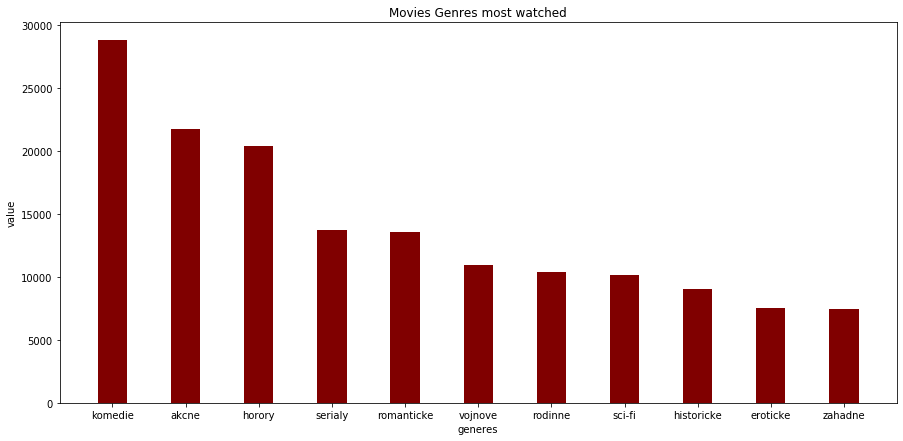

In [50]:
fig = plt.figure(figsize = (15, 7))
plt.bar(b.keys(), b.values() , color ='maroon',
        width = 0.4)

plt.xlabel("generes")
plt.ylabel("value")
plt.title("Movies Genres most watched")
plt.show()

In [52]:
df.loc[0:50000,31].isnull().sum()

8711

In [53]:
((50000-8711)/50000)*100

82.578

In [54]:
list1=df.loc[0:100000,21] #smokers details

list1=list1.to_numpy()

genres=[]    #  np.array([])


for i in list1:
    genres.append(i)

j=0
for i in genres:
    genres[j]=str(genres[j])
    #genres[j] = genres[j].translate(str.maketrans('', '', string.punctuation))
    #genres[j] = "".join(u for u in genres[j] if u not in ("?", ".", ";", ":", "!", ")","#", "=", "("))
    j+=1
    

In [55]:
list2=[]
j=0
for i in genres:
    if (len(genres[j].split(','))>1):
        x=(genres[j].split(','))
        z = [ i.strip() for i in x]
        list2=list2+z
    j+=1

In [56]:
print(len(list2))
array=np.zeros((0))
array=np.append(array, list2)

27293


In [57]:
from collections import Counter
b = Counter(array)
u=b.most_common()
print (b.most_common())

[('nefajcim', 7124), ('fajcim pravidelne', 2032), ('fajcim prilezitostne', 1433), ('uz nefajcim', 758), ('', 413), ('fajcim', 219), ('nikdy', 158), ('fuj', 63), ('ani nebudem', 61), ('uz', 48), ('snazim sa prestat', 41), ('a ani nebudem', 40), ('ani nechcem', 38), ('nie', 34), ('ale snazim sa prestat', 32), ('je to hnus', 32), ('neznasam to', 29), ('ani nikdy nebudem', 29), ('...', 28), ('.', 28), ('a nikdy nebudem', 28), ('nepijem', 27), (':)', 24), ('ako kedy', 23), ('nikdy v zivote', 23), ('bleee', 22), ('ee', 21), (':d', 21), ('a ani nikdy nebudem', 20), ('uz zasa ano', 20), ('fuuuj', 20), ('a ani nechcem', 20), ('naco', 18), ('hnus', 16), ('skoda penazi', 16), ('neznasam fajcenie', 16), ('blee', 16), ('co uz', 16), ('neznasam cigarety', 16), ('zatial', 15), ('no', 15), ('ne', 15), ('naco?', 14), ('fuuuuj', 14), ('nevidim v tom zmysel', 14), ('humus', 13), ('..', 13), ('prestal som', 13), ('....', 13), ('ble', 12), ('bohuzial', 12), ('je to humus', 12), ('ale chcem prestat', 12), (

In [58]:
b ={}
j=0
for i in u:
    b [i[0]] = i[1]
    if (j==3):
        break
    j+=1
b  

{'nefajcim': 7124,
 'fajcim pravidelne': 2032,
 'fajcim prilezitostne': 1433,
 'uz nefajcim': 758}

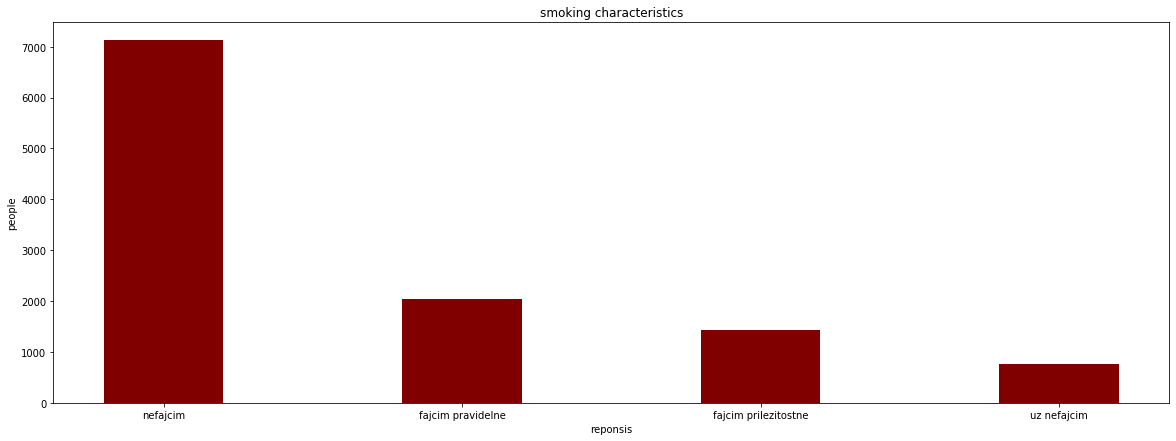

In [59]:
fig = plt.figure(figsize = (20, 7))
plt.bar(b.keys(), b.values() , color ='maroon',
        width = 0.4)

plt.xlabel("reponsis")
plt.ylabel("people")
plt.title("smoking characteristics")
plt.show()

In [64]:
df.loc[0:100000,21].isnull().sum()

15919

In [65]:
((50000-15919)/50000)*100

68.162

# LSH

In [62]:
copy=df

In [66]:
copy.rename(columns={'user_id':0}, inplace=True)

In [68]:
copy

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,38,39,40,41,42
0,1,1,14,1.0,"zilinsky kraj, zilina",2012-05-25 11:20:00.0,2005-04-03 00:00:00.0,26.0,"185 cm, 90 kg",it,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
3,3,0,38,1.0,"bratislavsky kraj, bratislava - karlova ves",2012-05-10 18:05:00.0,2010-05-23 00:00:00.0,29.0,NaN,"reklamy a medii, sluzieb a obchodu",...,NaN,"rock, metal, house, techno, pop, oldies, jazz","v aute, v praci, na koncerte, s partnerom",NaN,"slovenskej, talianskej, japonskej",pravidelne,"hokej, futbal, auto-moto sporty, squash","auto-moto sporty, futbal, hokej",NaN,NaN
4,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062840,1632785,1,47,1.0,"trenciansky kraj, povazska bystrica",2011-12-02 18:21:00.0,2010-12-13 00:00:00.0,37.0,"185 cm, 85 kg, akurat",NaN,...,doma z gauca,"disko, hip-hop",v aute,NaN,slovenskej,NaN,NaN,NaN,NaN,NaN
1062841,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",NaN,...,NaN,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN
1062842,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj..."
1062843,1632792,1,26,0.0,"trenciansky kraj, bojnice",2011-11-03 06:16:00.0,2011-07-21 00:00:00.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
cols=[41,30,29,38,26]
y=copy.loc[:,[41,29]]
not_nan = y.notnull()                  
rows_has_val = not_nan.any(axis=1)
y=y[rows_has_val]
indexes=y.index
indexes=indexes.to_numpy()
copy=copy.loc[indexes,:]

In [70]:
copy.isnull().sum()

0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8     118577
9     195905
10     96867
11    111846
12    160069
13    163491
14    137332
15     91397
16     51205
17     75478
18    111697
19    116982
20     81553
21     72660
22     79270
23     79111
24    109632
25    127519
26    200786
27    132189
28    114018
29    200162
30    270752
31    108973
32    140983
33    123534
34    129575
35    146304
36    146354
38    246487
39    183171
40    203951
41    200731
42    176684
dtype: int64

In [71]:
copy # resized data for LSH 

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,38,39,40,41,42
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,doma z gauca,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,v kine s ludmy ktory mam rad,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem
4,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN
5,5,1,66,1.0,"zilinsky kraj, zilina",2012-05-25 01:10:00.0,2006-05-29 00:00:00.0,26.0,NaN,som nezamestnany,...,v kine,"rock, sladaky, alternativa, povedal by som str...",ked ide o kvalitnu hudbu je jedno kde a kedy,"ist do kina alebo divadla, ist na koncert, s k...","slovenskej, talianskej",hlavne vytancit a vyspievat,"posilnovanie, informatik a posilka..jak som sa...",ja vacsinou na telku nemam cas a na pozeranie ...,skola mi bohate staci,je level kniha???
9,6,0,22,0.0,"zilinsky kraj, zilina",2012-05-25 20:40:00.0,2007-12-15 00:00:00.0,38.0,"160 cm, 57 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062839,1632783,1,71,1.0,"trenciansky kraj, povazska bystrica",2011-06-08 15:35:00.0,2011-02-11 00:00:00.0,37.0,"187 cm, 105 kg, ok",stavebnictva,...,doma z gauca,"disko, rock, rap, house, techno","v praci, vo vani, s partnerom, na diskoteke",pri svieckach s partnerom,"slovenskej, cinskej, mexickej, morske zivocichy",zriedkavo,"hokej, plavanie, biliard, snooker","bojove sporty, hokej, volejbal, hadzana, bilia...",robotnik,necitam knihy
1062840,1632785,1,47,1.0,"trenciansky kraj, povazska bystrica",2011-12-02 18:21:00.0,2010-12-13 00:00:00.0,37.0,"185 cm, 85 kg, akurat",NaN,...,doma z gauca,"disko, hip-hop",v aute,NaN,slovenskej,NaN,NaN,NaN,NaN,NaN
1062841,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",NaN,...,NaN,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN
1062842,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj..."


In [74]:
copy["S"] = "" # add a column at the end of dataframe to concatinate the vaules  of all columns for shingling
for (index, row) in copy.iterrows():
    S = ""
    for col  in row:
        #if pd.isnull(col) == False:
        S += " " + str(col)
    S = S.strip()
    copy.iloc[index, copy.shape[1]-1] = S

KeyboardInterrupt: 

In [73]:
copy

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,38,39,40,41,42,S
1,2,1,62,0.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:08:00.0,2007-11-30 00:00:00.0,0.0,"166 cm, 58 kg",NaN,...,"disko, pop, rap a jasn eto co teraz leti najvi...","na diskoteke, pri chodzi",pri svieckach s partnerom,slovenskej,NaN,NaN,NaN,NaN,NaN,
2,16,1,64,1.0,"zilinsky kraj, kysucke nove mesto",2012-05-25 23:19:40.0,2008-05-18 00:00:00.0,23.0,"173 cm, 70 kg",najvatcsej firme na svete urad prace,...,hoci co co zapasuje ale klasa vede atb samozre...,samozrejme sam kazdy ma iny vkus neda sa vsetk...,NaN,ak sa to da ziet tak setko,nie,"lyzovanie, plavanie",non kanal,bit lepsi ako druhy,uz ich moc nectem,"2 1 62 0.0 zilinsky kraj, kysucke nove mesto 2..."
4,17,1,47,0.0,"zilinsky kraj, martin",2012-05-25 09:40:00.0,2006-10-21 00:00:00.0,27.0,"162 cm, 60 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,"aerobik, kolieskove korcule, plavanie, posilno...",NaN,zivnostnik,NaN,"16 1 64 1.0 zilinsky kraj, kysucke nove mesto ..."
5,5,1,66,1.0,"zilinsky kraj, zilina",2012-05-25 01:10:00.0,2006-05-29 00:00:00.0,26.0,NaN,som nezamestnany,...,"rock, sladaky, alternativa, povedal by som str...",ked ide o kvalitnu hudbu je jedno kde a kedy,"ist do kina alebo divadla, ist na koncert, s k...","slovenskej, talianskej",hlavne vytancit a vyspievat,"posilnovanie, informatik a posilka..jak som sa...",ja vacsinou na telku nemam cas a na pozeranie ...,skola mi bohate staci,je level kniha???,
9,6,0,22,0.0,"zilinsky kraj, zilina",2012-05-25 20:40:00.0,2007-12-15 00:00:00.0,38.0,"160 cm, 57 kg",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"17 1 47 0.0 zilinsky kraj, martin 2012-05-25 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062839,1632783,1,71,1.0,"trenciansky kraj, povazska bystrica",2011-06-08 15:35:00.0,2011-02-11 00:00:00.0,37.0,"187 cm, 105 kg, ok",stavebnictva,...,"disko, rock, rap, house, techno","v praci, vo vani, s partnerom, na diskoteke",pri svieckach s partnerom,"slovenskej, cinskej, mexickej, morske zivocichy",zriedkavo,"hokej, plavanie, biliard, snooker","bojove sporty, hokej, volejbal, hadzana, bilia...",robotnik,necitam knihy,
1062840,1632785,1,47,1.0,"trenciansky kraj, povazska bystrica",2011-12-02 18:21:00.0,2010-12-13 00:00:00.0,37.0,"185 cm, 85 kg, akurat",NaN,...,"disko, hip-hop",v aute,NaN,slovenskej,NaN,NaN,NaN,NaN,NaN,
1062841,1632788,1,29,1.0,"ceska republika, cz - ustecky kraj",2012-05-12 16:33:00.0,2012-05-06 00:00:00.0,19.0,"190 cm, 55 kg, inteligentni",NaN,...,NaN,NaN,NaN,klobasy,NaN,kolo,"hokej, ale ne ten slovensky, stoji za nic",psycholog,NaN,
1062842,1632790,0,31,0.0,"bratislavsky kraj, bratislava - stare mesto",2012-05-09 13:45:00.0,2011-04-28 00:00:00.0,0.0,"postava,posedava,a vselico ine dokaze",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,talentovany amater,"papierove,tie su fajn ,su mobilne - do vane aj...",
